# Content

In the first file, we dealt with 1. Data Analysis and 2. Feature Engineering. Now, we'll cover 3. Feature Selection as well as 4. Model Building.

1. Data Analysis
2. Feature Engineering
3. **Feature Selection**
4. **Model Building**

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import os


import matplotlib.pyplot as plt
%matplotlib inline

data = 'train.csv'

print(os.getcwd())
os.chdir('/Users/christianbinkert/Documents/CAS/Machine_Learning/Seminararbeit') #Your path

data = pd.read_csv(data)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

/Users/christianbinkert/Documents/CAS/Machine_Learning


## 3 Feature Selection

Within the Feature Selection part, we select the final features to train and test our model. While we have seen a correlation btween all of our categorical and numerical features with the dependent variable by looking at the individual variable, we now want to examine the relation between the **independent variables** as well, to account for multi-collinearity.

Multi-collinarity raises several problems, i.e. dimishing the effect and interpretability of a single variable but potentially also leading to overfitting, which we want to prevent.

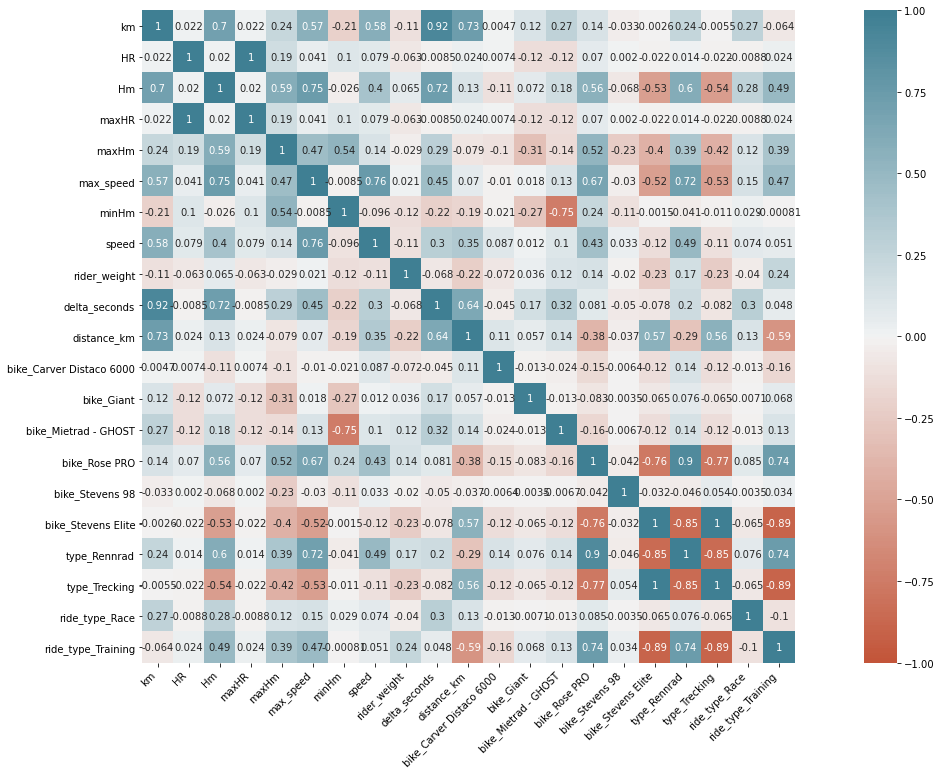

In [2]:
plt.figure(figsize=(25, 12))

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In our case, especially 'bike_Trecking' and 'bike_Stevens Elite' seem to be highly correlated. Since 'bike_Trecking' seems to explain the response varibale 'km' a bit better, we dropped 'bike_Stevens Elite'.
Keeping the sample constant and trying both approaches (i.e. once with and once without 'km'), R2 increases slightly, when dropping 'bike_Stevens Elite'.

We also drop 'HR','maxHR','minHm' as well as 'rider_weight' which showed a weak correlation in both the scatterplot as well as correlation matrix, which should make the life of our MLP a bit easier.

In [4]:
data.drop(['HR','maxHR','minHm','rider_weight','bike_Stevens Elite'], axis=1, inplace=True)

data.head()

,km,Hm,maxHm,max_speed,speed,delta_seconds,distance_km,bike_Carver Distaco 6000,bike_Giant,bike_Mietrad - GHOST,bike_Rose PRO,bike_Stevens 98,type_Rennrad,type_Trecking,ride_type_Race,ride_type_Training
0,1.601184,0.295651,0.463010,0.311101,0.237212,0.289976,0.116540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.407288,0.465150,0.613002,0.512729,0.409422,0.365439,0.281884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.775968,0.496445,0.575174,0.533832,0.425788,0.421327,0.320266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.102911,0.524574,0.581931,0.509447,0.437386,0.483273,0.461801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.650648,0.372810,0.528101,0.285376,0.142610,0.488273,0.322939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4. Model Building

### 4.1 Multi-Layer Perceptron

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, max_error, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X = data.drop(['km'],axis=1).values
y = data['km']

In [7]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

**Choice of the cost/ loss function**:
Mean Squared Errors, as we deal with a regression problem and try to predict continious numerical values.

**Optimizer**:
SGD and Adam were tried, better results were obtained when using the latter. Intuitively, SGD updates the parameters after seeing each data point. Given that we have a lot of outliers, we might stumble over a lot of noise and therefore we might not reach the optimal value. 

Adam mitigates this problem by using an adaptive learning rate as well as the idea of momentum to allow the model to faster reach the optimum of our cost function and is hence our choice.

**Activation function**: We use the Activation Function to introduce non-linear properties to the single neuron and to the overall function. Although ReLu performs better than the other activation functions provided, it might not capture negative patterns which we have in the dataset. LeakyRelu might be a better solution here.

https://srnghn.medium.com/deep-learning-overview-of-neurons-and-activation-functions-1d98286cf1e4

**Batch size**: When determining the batch size, we basically face a trade-off between the speed of convergence to the minimum vs. better progress in training. I.e. for smaller batch sizes we look at less data bevore we adapt, but may be inaccurate in dongi so (vice verca for the greater batch sizes). Reducing the batch size to 50 helped us to improve accuracy by 1%. 

https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

**Hidden Layers**: Are best determined empirically. Generally spoken, hidden layers help to build non-linear functions.

In [8]:
regr = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='relu', solver= 'adam', batch_size=50, random_state=1, max_iter=1000).fit(X_train, y_train)

In [9]:
y_predicted = regr.predict(X_test)

In [10]:
# Add relevant metrics for MLP
# https://scikit-learn.org/stable/modules/model_evaluation.html#max-error

m = r2_score(y_test,y_predicted)
m1 = mean_squared_error(y_test,y_predicted)
m2 = mean_absolute_error(y_test,y_predicted)
m3 = max_error(y_test,y_predicted)

print('The trained model can be avaulated by the following metrics: \n r2_score ' + str(m) + '\n mean_squared_error: ' + str(math.exp(m1)) + '\n mean_absolute_error: ' + str(math.exp(m2)) +'\n max_error: ' + str(math.exp(m3)) + '.')



The trained model can be avaulated by the following metrics: 
 r2_score 0.9784565835539414
 mean_squared_error: 1.0084011152239147
 mean_absolute_error: 1.058992163770205
 max_error: 1.7288643571981386.


**R2 score**:
Gives an indication of how well the dependent variables can be replicated by the learned funtion, based on the proportion of total variation of outcomes explained by the model. Since the best possible score is 1.0, we can conclude that the MLP performs quite well.

**Mean squared error**: Describes the squared average of the difference between the actual and the predicted values. 

**Mean absolute error**: Squared the term explained above. Since we're looking at absolute values, we don't get an idea about the direction. Also, large errors are not pealized.
By looking at our result, we can see that we've been on average 1.08 km away from the actual distance the rider was able to do. 

**Max error**: Calculates the worst case error between the predictend and the actual value. By looking at our model, our largest deviation was roughlx 1.8 km, so we estimated a distance that was almost 2 km shorter/greater than the actual distance done. 

### 4.2 Comparison to Linear Regression Models

We now go a step further and compare the Multi-Layer Perceptron with classic Regression models, which are: Linear Regression, Lasso and RidgeRegression.
While the first one applies ordinary least squares, Lasso and Ridge penalize overfitting by multiplying the weights with alpha ((1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1).

In [11]:
#Building our method, that takes the models, hereby applying directly the train-test-split method

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(data.drop('km',axis=1), 
                                                                data['km'], 
                                                                test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [12]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}

In [13]:
test(models, data)

,OLS,Lasso,Ridge
0,0.967572,0.000000,0.961012
1,0.960953,-0.012954,0.952286


In [14]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(data.drop('km',axis=1), data['km']).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(data.drop('km',axis=1), data['km']).best_estimator_,}

In [15]:
test(models2, data)

,OLS,Lasso,Ridge
0,0.968013,0.856240,0.252342
1,0.959302,0.852802,0.237067


## Conclusion

As we can see, the Multi-Layer Perceptron performed best on the numerical data at hand. Remarkable in this respect is it's performance given the relatively small sample size with n<550 and it's accuracy when choosing the right input data.